## Load the SVHN dataset

In [ ]:
!pip install wget

In [6]:
import wget
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
extra_url = "http://ufldl.stanford.edu/housenumbers/extra_32x32.mat"

train_data = wget.download(train_url)
train_data = 'train_32x32.mat'
test_data = wget.download(test_url)
test_data = 'test_32x32.mat'
extra_data = wget.download(extra_url)
extra_data = 'extra_32x32.mat'

In [5]:
train_data

'train_32x32.mat'

In [4]:
from scipy.io import loadmat
data_train = loadmat(train_data)
data_test = loadmat(test_data)
data_extra = loadmat(extra_data)

## EDA

In [7]:
type(data_train), type(data_test)

(dict, dict)

In [8]:
# a dic has three attributes: .items() / .keys() / .values()
data_train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [11]:
X_train = data_train['X']
X_test = data_test['X']
X_extra = data_extra['X']

X_train = np.transpose(X_train, (3, 0, 1, 2))
X_train.shape
X_test = np.transpose(X_test, (3, 0, 1, 2))
X_extra = np.transpose(X_extra, (3, 0, 1, 2))

X_train = np.concatenate((X_train, X_extra[:50000]))

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0



y_train = data_train['y']
y_test = data_test['y']
y_train = np.concatenate((y_train, y_extra[:50000]))


y_train = np.where(y_train==10, 0, y_train)
y_test = np.where(y_test==10, 0, y_test)

In [10]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [11]:
X_train.shape

(73257, 32, 32, 3)

In [12]:
# onehot encoding labels
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Lable of 46941 th image is: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


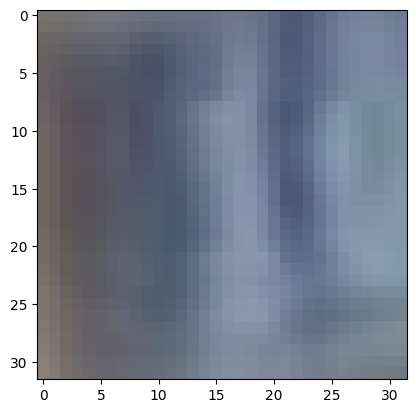

In [13]:
i = np.random.randint(1, len(X_train))
print(f"Lable of {i} th image is: {y_train[i]}")
plt.imshow(X_train[i, :,:,:])

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(InputLayer(input_shape=X_train[0].shape))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

model.add(Flatten())
#overfitting handling
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dropout_2 (Dropout)         (None, 10816)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               2769152   
                                                      

In [19]:
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
3467/3467 [==============================] - 19s 5ms/step - loss: 0.6234 - accuracy: 0.8109 - val_loss: 0.2672 - val_accuracy: 0.9269
Epoch 2/20
3467/3467 [==============================] - 17s 5ms/step - loss: 0.3562 - accuracy: 0.8947 - val_loss: 0.2267 - val_accuracy: 0.9360
Epoch 3/20
3467/3467 [==============================] - 16s 5ms/step - loss: 0.2888 - accuracy: 0.9144 - val_loss: 0.1919 - val_accuracy: 0.9482
Epoch 4/20
3467/3467 [==============================] - 18s 5ms/step - loss: 0.2489 - accuracy: 0.9259 - val_loss: 0.1774 - val_accuracy: 0.9530
Epoch 5/20
3467/3467 [==============================] - 16s 5ms/step - loss: 0.2188 - accuracy: 0.9345 - val_loss: 0.1768 - val_accuracy: 0.9538
Epoch 6/20
3467/3467 [==============================] - 15s 4ms/step - loss: 0.1927 - accuracy: 0.9411 - val_loss: 0.1754 - val_accuracy: 0.9542
Epoch 7/20
3467/3467 [==============================] - 16s 5ms/step - loss: 0.1733 - accuracy: 0.9461 - val_loss: 0.1875 - val_ac

In [21]:
score = model.evaluate(X_test, y_test)
print("test loss: ",  score[0])
print("test accuracy: ",  score[1])

814/814 [==============================] - 2s 3ms/step - loss: 0.5099 - accuracy: 0.9125
test loss:  0.5099462270736694
test accuracy:  0.9124538898468018


In [27]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
model.input_shape

(None, 32, 32, 3)